In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Аналитическое решение**

In [2]:
def analytical(x, t):
    return np.log( (1 + x**2 / 2) / ( 1 - t ) )

In [3]:
def result(L):
    x = np.linspace(0, 1, L+1)
    return analytical(x, t = 0.9)

In [4]:
data_10 = pd.DataFrame()
data_10["x"] = np.linspace(0,1,11)
data_10["u (аналитическое)"] = result(10)
data_10 

,x,u (аналитическое)
0,0.0,2.302585
1,0.1,2.307573
2,0.2,2.322388
3,0.3,2.346602
4,0.4,2.379546
5,0.5,2.420368
6,0.6,2.468100
7,0.7,2.521721
8,0.8,2.580217
9,0.9,2.642622


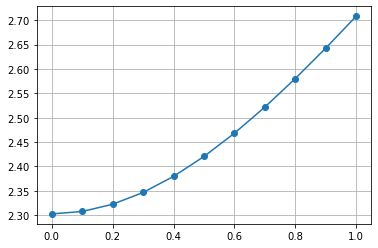

In [5]:
plt.grid()
plt.plot(np.linspace(0, 1, 11), result(10), marker="o")

**Численное решение**

In [6]:
def phi(x):
    return np.log(1 + x**2/2)

def psi_1(t):
    return -np.log(1 - t)

def psi_2(t):
    return np.log(1.5/(1 - t))

In [7]:
def sweep_method(u, tau, h, u_left, u_right, epsilon=1e-5):
    L = u.size
    C = tau / (2 * h**2)
    d = -u[1:-1]
    
    u_k = u
    max_diff = epsilon + 1
    
    a = np.zeros(L-2)
    b = np.zeros(L-2)
    c = np.zeros(L-2)
    
    for i in range(1, L-1):
        a[i-1] =  C * (np.exp(u_k[i+1]) + np.exp(u_k[i]))
        c[i-1] =  C * (np.exp(u_k[i]) + np.exp(u_k[i-1]))
        b[i-1] = -a[i-1] - c[i-1] - 1
    
    while max_diff > epsilon:
        alpha = [-a[0] / b[0]]
        beta  = [(d[0] - c[0] * u_left) / b[0]]

        for l in range(1, L - 2):
            alpha.append(-a[l] / (b[l] + c[l]*alpha[l-1]))
            beta.append((d[l] - c[l]*beta[l-1]) / (b[l] + c[l]*alpha[l-1]))

        u_next = np.zeros(L)
        u_next[0] = u_left
        u_next[-1] = u_right
    
        for l in range(L - 2, 0, -1):
            u_next[l] = alpha[l - 1] * u_next[l + 1] + beta[l - 1]
        
        max_diff = np.max(np.abs((u_next - u_k)[1:-1] / u_next[1:-1]))
        u_k = u_next

    return u_k

In [8]:
def common_answer(L, N):
    x, h = np.linspace(0, 1, L, retstep=True)
    t, tau = np.linspace(0, 0.9, N, retstep=True)
    U = np.zeros(shape=(N, L))
    U[0] = phi(x)
    U_0 = psi_1(t)
    U_L = psi_2(t)

    for n, t in enumerate(t[1:], 1):
        U[n] = sweep_method(U[n-1], tau, h, U_0[n], U_L[n])
    u = U[-1]
    return u

In [19]:
degree = 4
L = 10*2**degree
N = 10*2**(2*degree)
x = np.linspace(0, 1, L+1)
print("L =", L+1, " N =", N+1)
data = pd.DataFrame()
data["x"] = x[::2**degree]
data["u (аналитическое)"] = result(L)[0::2**degree]
data["u (численное)"]     = common_answer(L+1, N+1)[::2**degree]
data["Погрешность"]       = np.abs( result(L) - common_answer(L+1, N+1) )[::2**degree]
data

L = 161  N = 2561


,x,u (аналитическое),u (численное),Погрешность
0,0.0,2.302585,2.302585,0.000000
1,0.1,2.307573,2.307500,0.000073
2,0.2,2.322388,2.322261,0.000127
3,0.3,2.346602,2.346440,0.000162
4,0.4,2.379546,2.379368,0.000178
5,0.5,2.420368,2.420190,0.000178
6,0.6,2.468100,2.467936,0.000164
7,0.7,2.521721,2.521584,0.000136
8,0.8,2.580217,2.580119,0.000098
9,0.9,2.642622,2.642570,0.000052


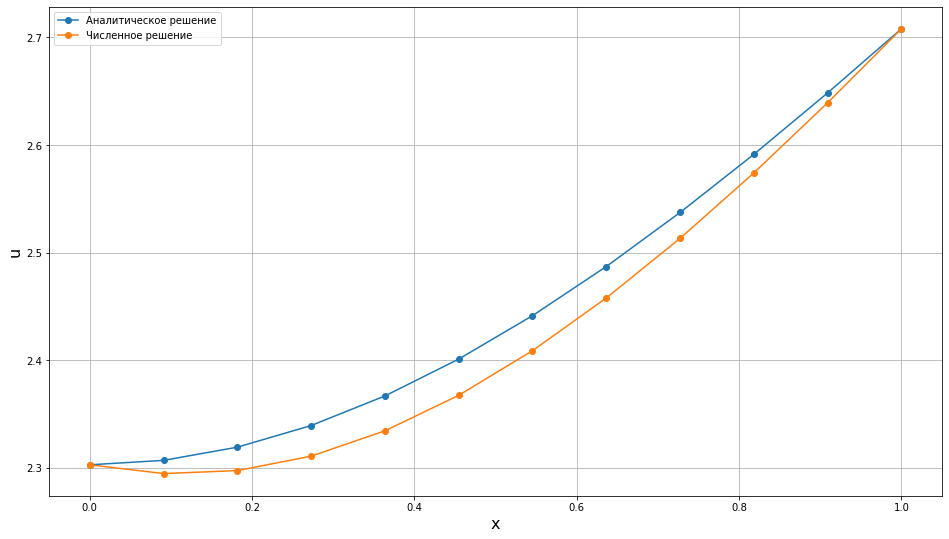

In [10]:
plt.figure(figsize = (16,9))
plt.plot(x, result(L), marker= "o", label = 'Аналитическое решение')
plt.plot(x, common_answer(L+1, N+1), marker= "o", label = 'Численное решение')
plt.xlabel('x', fontsize=16)
plt.ylabel('u', fontsize=16)
plt.legend()
plt.grid()

**Погрешность**

In [11]:
def error(U1, U2):
    error = np.max(np.abs(U2 - U1))
    return error

In [12]:
err = 0
diff = []
ll   = []
for i in range(6):
    L = 10 * 2 ** i 
    ll.append(L)
    N = 10 * 2 ** (2*i)
    err = error(result(L), common_answer(L+1, N+1))
    diff.append(err)

In [13]:
for i in range(1, len(diff)):
    print( round( diff[i-1]/diff[i], 5))

3.34977
3.79853
3.94562
3.98613
3.99652


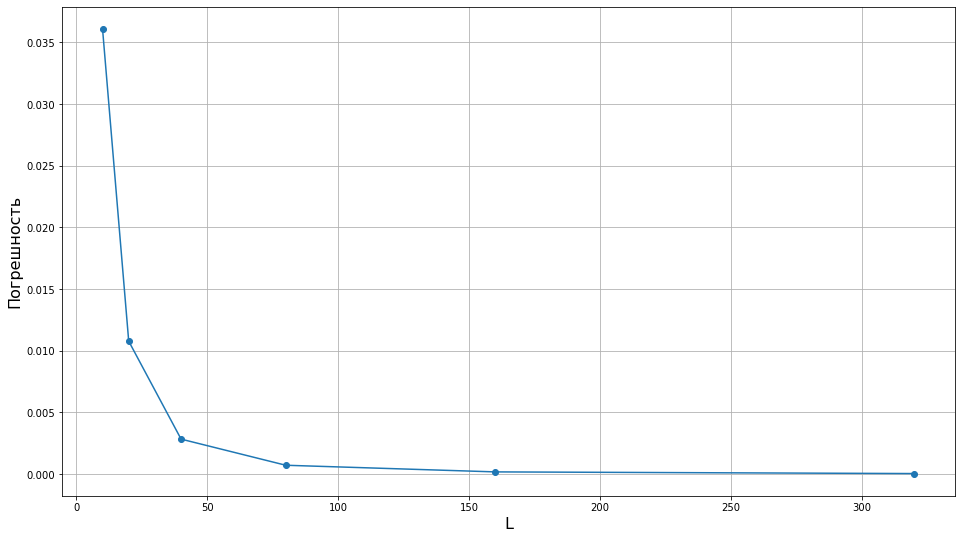

In [14]:
plt.figure(figsize = (16,9))
plt.plot(ll, diff, marker= "o")
plt.xlabel('L', fontsize=16)
plt.ylabel('Погрешность',  fontsize=16)
plt.grid()